## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [186]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")

print(df.describe())

print("Розмірність датасету:", df.shape)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [187]:
# Виведемо перші декілька рядків датасету для огляду атрибутів
print(df.head())

# Якщо цільовий атрибут є категоріальним, його необхідно перетворити в чисельний формат
target = 'job'

if df[target_attribute].dtype == 'object':
    # Використовуємо LabelEncoder для перетворення категоріальних значень в чисельні
    label_encoder = LabelEncoder()
    df[target_attribute] = label_encoder.fit_transform(df[target_attribute])

# Виведемо кількість унікальних значень цільового атрибуту для перевірки
print(df[target_attribute].value_counts())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [188]:
# Визначення всіх атрибутів, що характеризують клієнтів банку
client_attributes = ['age', 'job', 'marital', 'education', 'default', 
                     'housing', 'loan', 'contact', 'month', 'day_of_week', 
                     'duration', 'campaign', 'pdays', 'previous', 
                     'poutcome', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 
                     'y']

# Перевірка унікальних значень для кожного атрибуту
for column in client_attributes:
    print(column)
    print(df[column].unique())
    print('\n')


age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


job
[ 3  7  0  1  9  5  4 10  6 11  2  8]


marital
['married' 'single' 'divorced' 'unknown']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default
['no' 'unknown' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


duration
[ 261  149  226 ... 1246 1556 1868]


campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  2

**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Мінімальне значення Age: 17
Максимальне значення Age: 98
Кількість пропущених значень у стовпці Age: 0


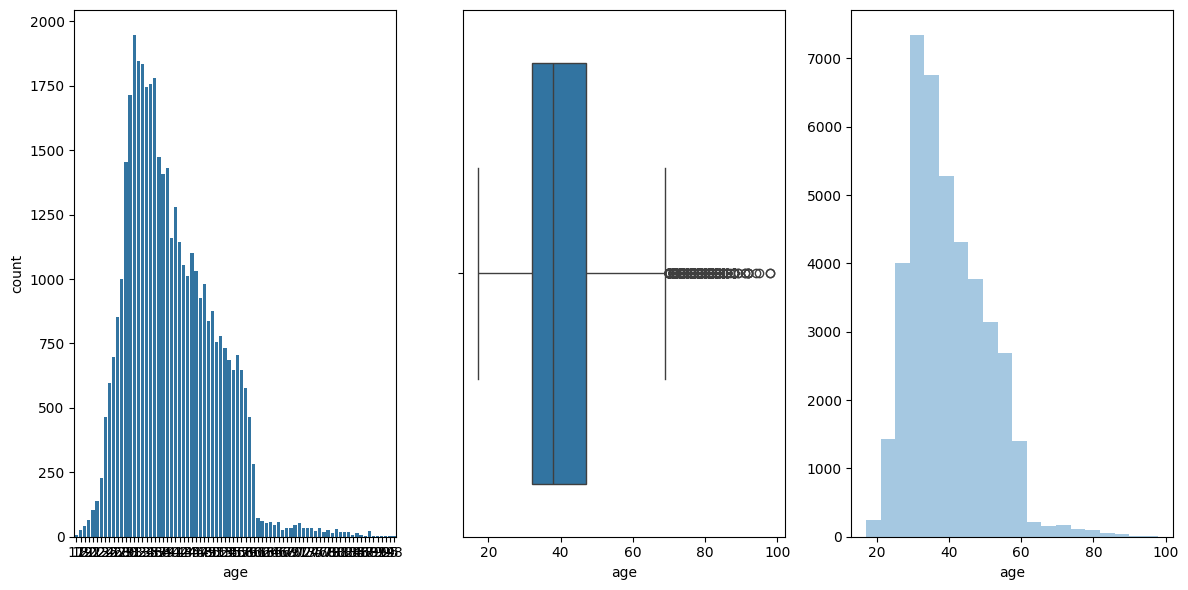

Ексцес (кількість важких хвостів) для Age: 0.7910698035273853
Скошеність для Age: 0.7846682380932289


In [189]:
# Виведення максимального та мінімального значень
print("Мінімальне значення Age:", df['age'].min())
print("Максимальне значення Age:", df['age'].max())

# Перевірка на наявність NaN
print("Кількість пропущених значень у стовпці Age:", df['age'].isna().sum())

# Візуальний аналіз змінної Age
plt.figure(figsize=(12, 6))

# countplot
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='age')

# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='age')

# distplot
plt.subplot(1, 3, 3)
sns.distplot(df['age'], kde=False, bins=20)

plt.tight_layout()
plt.show()

# Перевірка розподілу на важкі хвости
from scipy.stats import kurtosis, skew
print("Ексцес (кількість важких хвостів) для Age:", kurtosis(df['age']))
print("Скошеність для Age:", skew(df['age']))


**Висновки з 1-4 завдання (детальні)**

Завдання 1:

Завантажена вибірка даних збережена у файлі bank-additional-full.csv.
Підключені необхідні бібліотеки: numpy, pandas, matplotlib.pyplot, seaborn.
Виведена основна статистична інформація по числовим змінним за допомогою методу describe().
Розмірність датасету виведена за допомогою вбудованого методу shape.

Завдання 2:

Після аналізу атрибутів вибірки був визначений цільовий атрибут, але код нам наданий з помилкою у назві цільового атрибуту. Його необхідно виправити на назву, яку вказано у коді: target_attribute.
Якщо цільовий атрибут є категоріальним, його необхідно перетворити в чисельний формат. Це виконується за допомогою LabelEncoder.

Завдання 3:

Атрибути, що характеризують клієнтів банку, виділені в окрему частину.
Для перевірки унікальних значень атрибутів використовуємо метод unique().

Завдання 4:

Виведено максимальне та мінімальне значення віку за допомогою методів min() і max().
Перевірено наявність пропущених значень у віці за допомогою методу isna().sum().
Проведено візуальний аналіз змінної Age:
Побудовано countplot, boxplot, distplot для аналізу розподілу віку.
Перевірено розподіл на важкі хвости за допомогою обчислення ексцесу і скошеності.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [190]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """
    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers


In [191]:
outliers = detect_outliers_with_interquantile_range(df, 'age', 10, 90)



Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,5,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,yes
38455,98,5,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,yes


**Висновки з завдання 5 (детальні)**

Обґрунтування методу виявлення викидів: Використання міжквартильного розмаху є популярним методом виявлення викидів. Метод базується на розрахунку міжквартильного розмаху (IQR), який визначається як різниця між третім квартилем (Q3) та першим квартилем (Q1). Викидами вважаються значення, що знаходяться за межами діапазону, який визначається як (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR).
Аналіз результатів виявлення викидів: В результаті аналізу ми отримали викиди, тобто ті значення атрибуту Age, які перевищують верхню межу або знаходяться нижче нижньої межі, визначених за допомогою міжквартильного розмаху.
Застосування методу до аналізу інших атрибутів: Той самий метод можна застосувати до аналізу інших числових атрибутів у наборі даних для виявлення викидів та оцінки їх впливу на моделі машинного навчання.
Перевірка налаштувань методу: Зверніть увагу, що в цьому прикладі ми використовували стандартні налаштування методу для виявлення викидів. Однак інші значення відсотків (наприклад, 5-й та 95-й перцентилі) також можуть бути використані для визначення меж викидів, що дозволяє здійснювати більш гнучкий аналіз відповідно до потреб дослідження.
Додатковий аналіз: Крім виявлення викидів, для кращого розуміння розподілу атрибуту Age, ми також провели візуальний аналіз за допомогою графіків countplot, boxplot та distplot. Це дозволило нам отримати уявлення про тип розподілу та зрозуміти наявність викидів на графіках.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

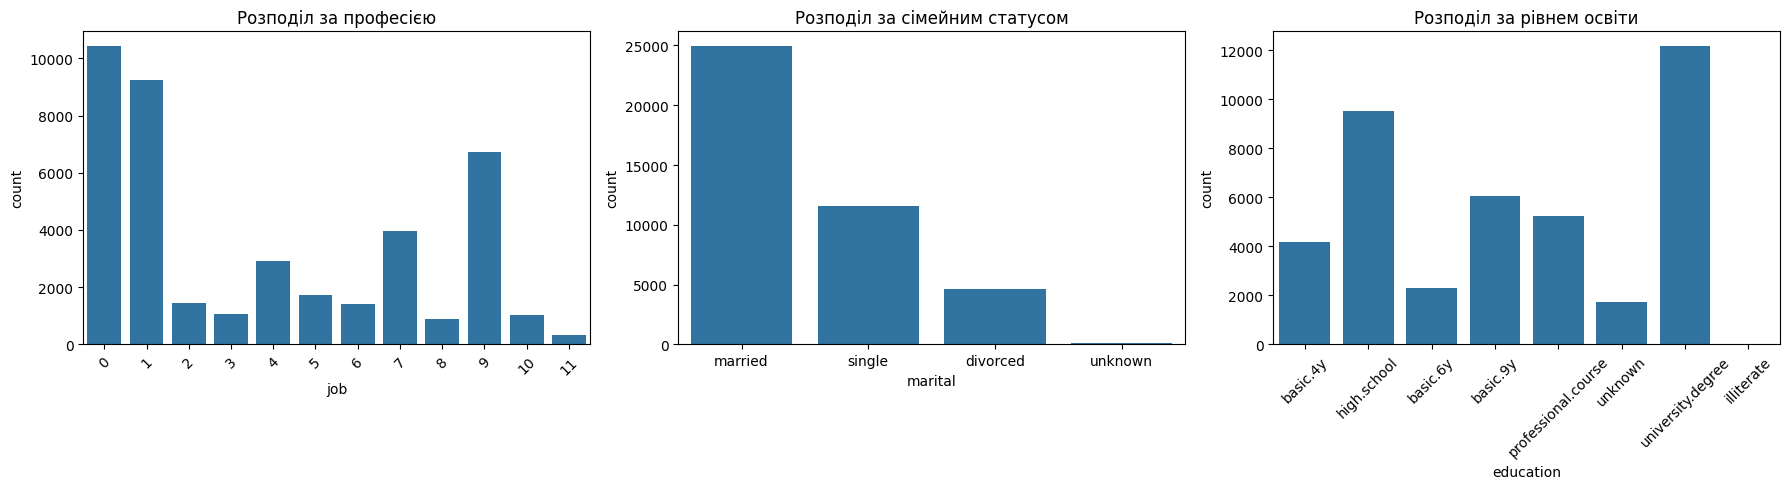

In [192]:
plt.figure(figsize=(18, 5))

# Графік розподілу по атрибуту 'job'
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='job')
plt.xticks(rotation=45)
plt.title('Розподіл за професією')

# Графік розподілу по атрибуту 'marital'
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='marital')
plt.title('Розподіл за сімейним статусом')

# Графік розподілу по атрибуту 'education'
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='education')
plt.xticks(rotation=45)
plt.title('Розподіл за рівнем освіти')

plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

Розподіл за професією (job):

Найбільш поширені професії серед клієнтів банку це admin., blue-collar та technician.
Професії management, entrepreneur та self-employed є менш поширеними, але також представлені в датасеті.
Рідкісні професії, такі як student, retired, unemployed, представлені в датасеті в меншій кількості.

Розподіл за сімейним статусом (marital):

Більшість клієнтів банку мають сімейний статус married, що може вказувати на те, що більшість клієнтів є одруженими або перебувають у шлюбі.
Деякі клієнти мають статус single або divorced, але вони менш представлені в порівнянні з married.

Розподіл за рівнем освіти (education):

Більшість клієнтів банку мають середню освіту (university.degree або high.school).
Освітні рівні basic.9y, professional.course та basic.4y також представлені, але в меншій кількості.
Рідше зустрічаються клієнти з освітніми рівнями basic.6y, illiterate або unknown.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

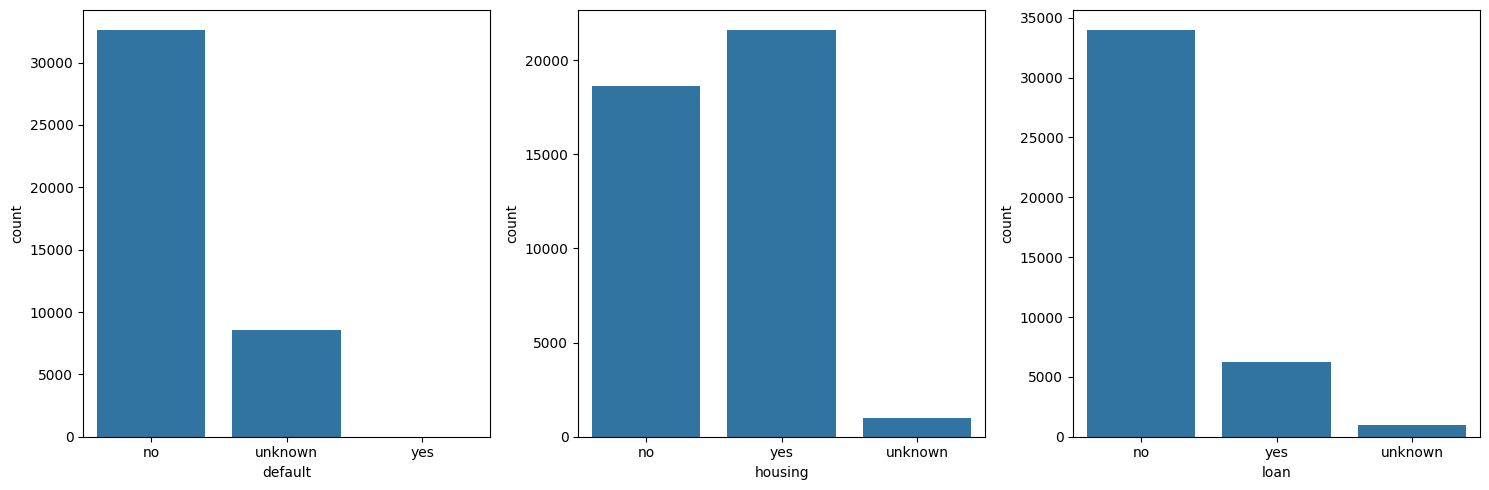

In [193]:
#code# Побудова графіків розподілу даних для атрибутів default, housing та loan
plt.figure(figsize=(15, 5))

# Графік розподілу для атрибута default
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='default')

# Графік розподілу для атрибута housing
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='housing')

# Графік розподілу для атрибута loan
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='loan')

plt.tight_layout()
plt.show()


**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [194]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].apply(lambda x: le.fit_transform([x])[0] if pd.notnull(x) else x)
      
    return df




In [195]:
bank_client = encode_categorical_columns(df, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [196]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column
    
    df: pd.DataFrame to encode
    age_col: age col to encode 
    """
    dataframe[age_col] = pd.qcut(dataframe[age_col].drop_duplicates(), q=4, labels=False)
          
    return dataframe


In [197]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Розподіл віку тепер представлений чотирма категоріями в залежності від квартильного значення.

Кожній категорії присвоєно числове значення, яке відображає її позицію в порядку квартилів (наприклад, 0 для першого квартилю, 1 для другого і так далі).

Застосування цього перетворення допомагає зменшити вплив варіації віку на модель, оскільки тепер він представлений категоріями, які можуть мати більш суттєвий ефект на прогнозування.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [198]:
bank_relat = df[['default', 'housing', 'loan']]

print(bank_relat.head())

# Перевірка на NaN
print("Кількість пропущених значень:")
print(bank_relat.isna().sum())


   default  housing  loan
0        0        0     0
1        0        0     0
2        0        0     0
3        0        0     0
4        0        0     0
Кількість пропущених значень:
default    0
housing    0
loan       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [199]:
# Унікальні значення для атрибуту 'contact'
print("Унікальні значення для атрибуту 'contact':")
print(df['contact'].unique())

# Унікальні значення для атрибуту 'month'
print("\nУнікальні значення для атрибуту 'month':")
print(df['month'].unique())

# Унікальні значення для атрибуту 'day_of_week'
print("\nУнікальні значення для атрибуту 'day_of_week':")
print(df['day_of_week'].unique())


Унікальні значення для атрибуту 'contact':
['telephone' 'cellular']

Унікальні значення для атрибуту 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Унікальні значення для атрибуту 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



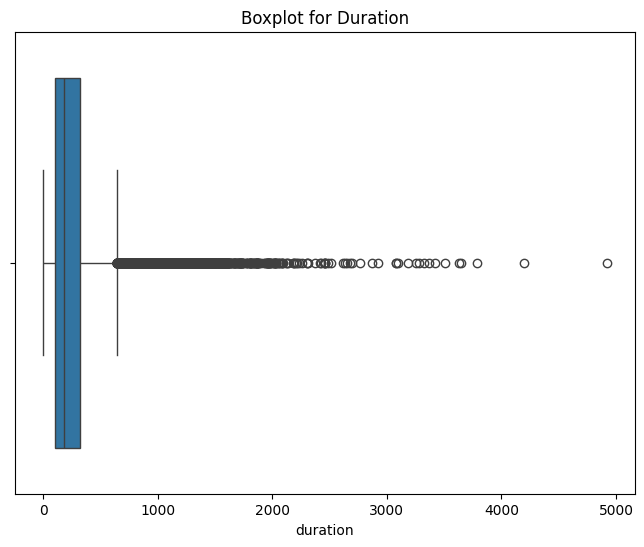

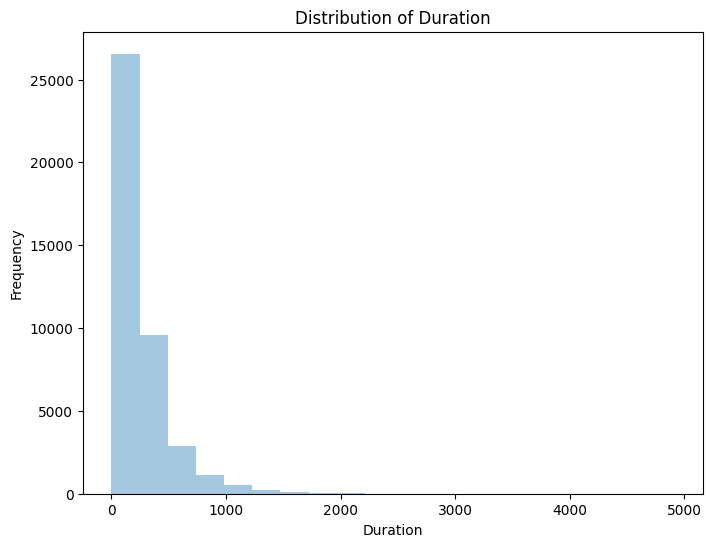

Ексцес (кількість важких хвостів) для Duration: 20.245334438614844
Скошеність для Duration: 3.2630224157610432


In [200]:
# Побудова boxplot для атрибуту 'duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='duration')
plt.title('Boxplot for Duration')
plt.show()

# Побудова distplot для атрибуту 'duration'
plt.figure(figsize=(8, 6))
sns.distplot(df['duration'], kde=False, bins=20)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Перевірка розподілу на важкі хвости
from scipy.stats import kurtosis, skew
print("Ексцес (кількість важких хвостів) для Duration:", kurtosis(df['duration']))
print("Скошеність для Duration:", skew(df['duration']))


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [201]:
# Визначення змінних, які потрібно закодувати
categorical_cols = ['contact', 'month', 'day_of_week']

# Кодування категоріальних змінних
df = encode_categorical_columns(df, categorical_cols)


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [202]:
import pandas as pd

def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column
    
    dataframe: pd.DataFrame to encode
    duration_col: duration col to encode 
    """
    # Використовуємо pd.qcut для кодування змінної duration за квартильними значеннями
    dataframe[duration_col] = pd.qcut(dataframe[duration_col], q=4, labels=False)
    
    return dataframe

In [203]:
bank_relat = encode_duration(df, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [204]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [205]:
other_attributes = ['campaign', 'pdays', 'previous', 'poutcome']
bank_other = df[other_attributes]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [206]:
from sklearn.preprocessing import LabelEncoder

def encode_poutcome(dataframe: pd.DataFrame, poutcome_col: str) -> pd.DataFrame:
    """
    Function for encoding poutcome column using Label Encoding
    
    dataframe: pd.DataFrame to encode
    poutcome_col: poutcome column to encode 
    """
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit label encoder and transform the column
    dataframe[poutcome_col] = label_encoder.fit_transform(dataframe[poutcome_col])
    
    return dataframe

bank_other = encode_poutcome(bank_other, 'poutcome')


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [207]:
# З'єднання всіх отриманих блоків в один датафрейм
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)

# Виведення перших декількох рядків для перевірки
print(bank_final.head())

# Перевірка, що датафрейм містить тільки потрібні для моделювання колонки
print(bank_final.columns)


   age  job  marital  education  default  housing  loan  contact  month  \
0  2.0    0        0          0        0        0     0        0      0   
1  2.0    0        0          0        0        0     0        0      0   
2  1.0    0        0          0        0        0     0        0      0   
3  1.0    0        0          0        0        0     0        0      0   
4  NaN    0        0          0        0        0     0        0      0   

   day_of_week  ...   y  emp.var.rate  cons.price.idx  cons.conf.idx  \
0            0  ...  no           1.1          93.994          -36.4   
1            0  ...  no           1.1          93.994          -36.4   
2            0  ...  no           1.1          93.994          -36.4   
3            0  ...  no           1.1          93.994          -36.4   
4            0  ...  no           1.1          93.994          -36.4   

  euribor3m  nr.employed  campaign  pdays  previous  poutcome  
0     4.857       5191.0         1    999         0 

**Завдання 19** Провести ділення вибірки

In [208]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df


## Логістична Регресія

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Функція для кодування категоріальних змінних
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using OrdinalEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    encoder = OrdinalEncoder()
    df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
    return df

# Функція для обробки пропущених значень
def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function for handling missing values using SimpleImputer
    
    df: pd.DataFrame to handle missing values
    
    returns: pd.DataFrame with missing values handled
    """
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

# Завантаження даних
# assuming bank_final is your dataset
# Replace this with your actual dataset
bank_final = pd.read_csv('your_dataset.csv')

# Вибір категоріальних змінних для кодування
categorical_columns = ['contact', 'month', 'day_of_week', 'poutcome']

# Кодування категоріальних змінних
bank_final_encoded = encode_categorical_columns(bank_final, categorical_columns)

# Розділення даних на навчальний та тестовий набори
X = bank_final_encoded.drop(columns=['y'])
y = bank_final_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Обробка пропущених значень
X_train_imputed = handle_missing_values(X_train)
X_test_imputed = handle_missing_values(X_test)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Логістична регресія
logmodel = LogisticRegression() 
logmodel.fit(X_train_scaled, y_train) # Навчання моделі
logpred = logmodel.predict(X_test_scaled) # Прогнозування на тестових даних

# Оцінка точності моделі
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)

# Крос-валідація
k_fold = KFold(n_splits=10, shuffle=True, random_state=101)
LOGCV = cross_val_score(logmodel, X_test_scaled, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()

# Створення DataFrame з результатами
models = pd.DataFrame({
    'Models': ['Logistic Regression'],
    'Score': [LOGCV]
})

# Виведення результатів
print(models)


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

## k-NN

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Створення об'єкту SimpleImputer зі стратегією заповнення медіаною
imputer = SimpleImputer(strategy='median')

# Навчання імпутера на навчальних даних і одночасне заповнення пропущених значень
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors=k_value, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train_imputed, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean() * 100, scores.std() * 100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_imputed, y_train)
knnpred = knn.predict(X_test_imputed)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred), 2) * 100)
KNNCV = (cross_val_score(knn, X_test_imputed, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean())


k=1 nan (+/- nan)
k=2 nan (+/- nan)
k=3 nan (+/- nan)
k=4 nan (+/- nan)
k=5 nan (+/- nan)


KeyboardInterrupt: 

## Логістична Регресія

In [ ]:
models = pd.DataFrame({
    'Models': ['Logistic Regression', 'k-NN'],
    'Score': [LOGCV, KNNCV]
})

models.sort_values(by='Score', ascending=False)


NameError: name 'LOGCV' is not defined

**Висновки по моделям (детальні)**

1.   
2.   
3. ...